In [54]:
#Stefans document
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
import re
from scipy.signal import find_peaks
plt.rcParams['figure.dpi'] = 150
%matplotlib inline
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14, top=True, direction="in")
plt.rc("ytick", labelsize=14, right=True, direction="in")
plt.rc("axes", titlesize=14)
plt.rc("legend", fontsize=14, loc="upper left")

cm = 1.5/2.54 #define ratio for cm and inches

In [55]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_2'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [56]:
time = [] #array for all time data lists
V1 = [] #Same again for votlage readings

for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=3)
    time.append(np.linspace(0, 10, len(Data[:, 0])))
    V1.append(Data[:, 1])  # Assuming V1 is in the first column
    #print(time)
    #print(V1)

In [57]:
#Here we make the functions for the fits used
#Guesses for the linear function
a_lin_guess = 0.6 
n_lin_guess = 21e-7
offset_lin_guess = 0.4
p0_lin = [a_lin_guess, n_lin_guess, offset_lin_guess]

l = 0.065 #cm length of weird tube we compress the air in
freq_constant = (2*np.pi)/(633e-9)*l

#Linear fit function hoping that it works on a linear fit
def Linear_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    return amplitude *(np.cos(freq_constant*2*(n-1)*t)) + offset

#Guesses for the quadratic fit
a_quad_guess = 0.7
n_quad_guess = 21
offset_quad_guess = 0.4
m_quad_guess = 0
p0_Quad = [a_quad_guess, n_quad_guess, offset_quad_guess, m_quad_guess]

#Quadratic fit function if it works like this
def Quad_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    m = p[3]
    return amplitude *(np.cos(freq_constant*2*((n-1)*t**2+m*t))) + offset

Linear Parameters:

Quadratic Parameters:
Number of peaks: 313


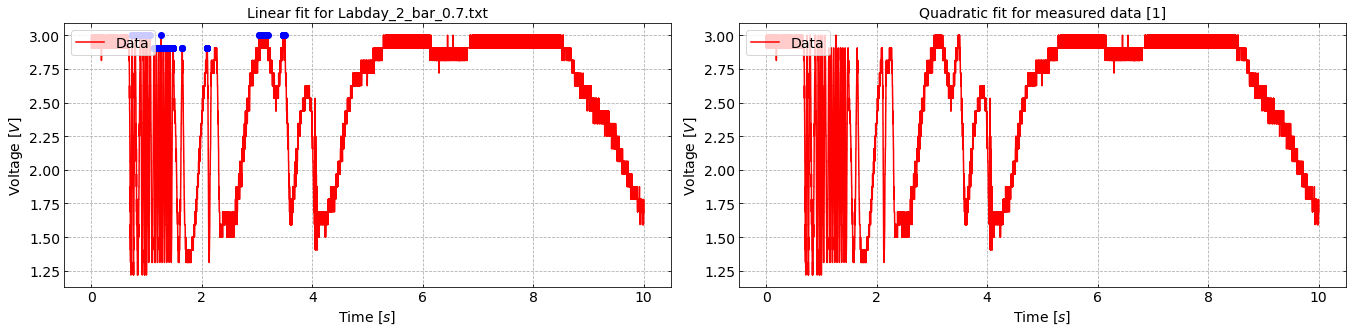

Linear Parameters:

Quadratic Parameters:
Number of peaks: 117


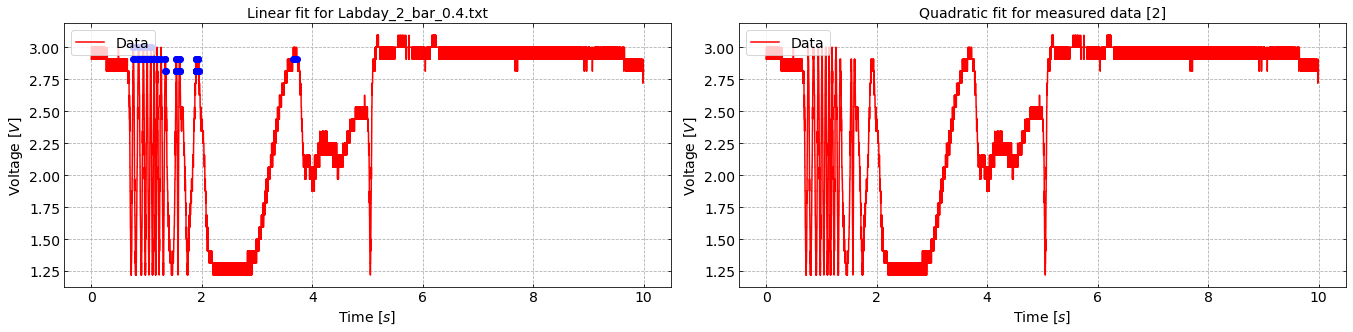

Linear Parameters:

Quadratic Parameters:
Number of peaks: 426


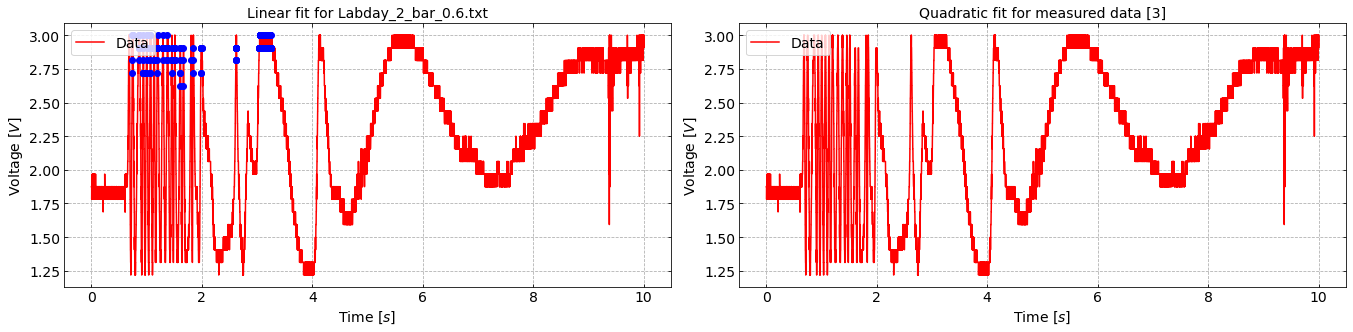

Linear Parameters:

Quadratic Parameters:
Number of peaks: 223


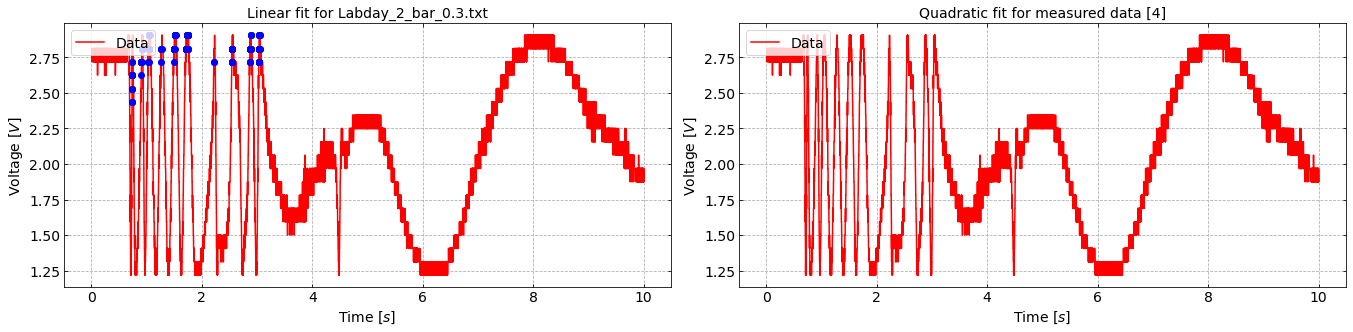

Linear Parameters:

Quadratic Parameters:
Number of peaks: 429


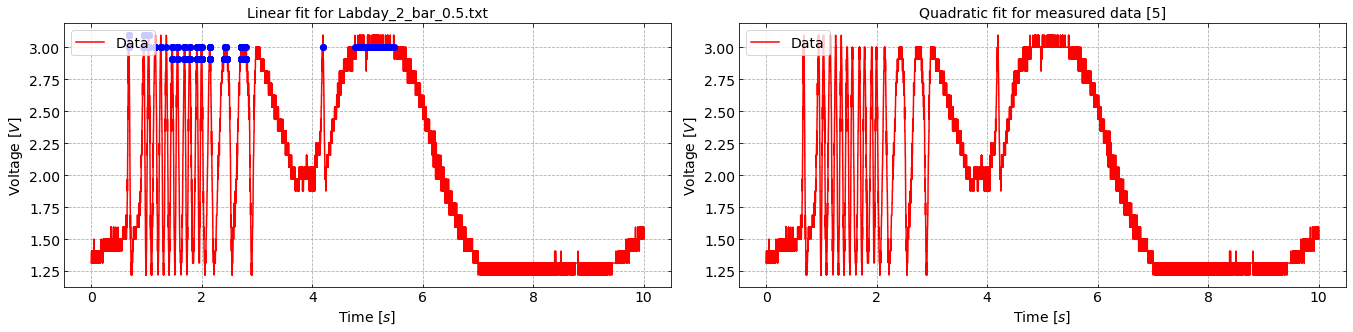

Linear Parameters:

Quadratic Parameters:
Number of peaks: 646


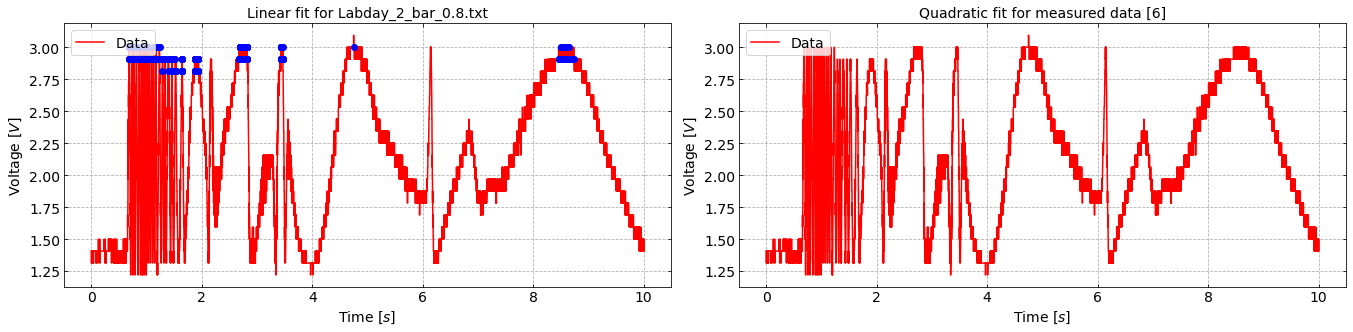

Linear Parameters:

Quadratic Parameters:
Number of peaks: 914


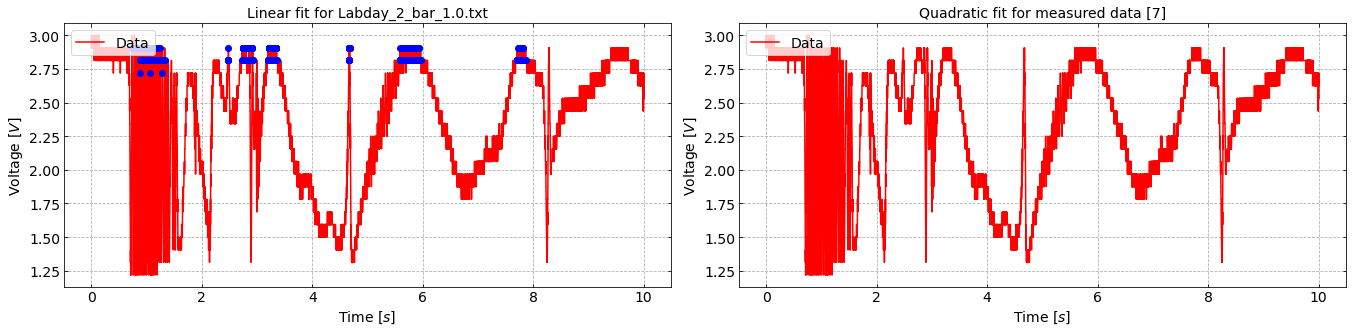

Linear Parameters:

Quadratic Parameters:
Number of peaks: 246


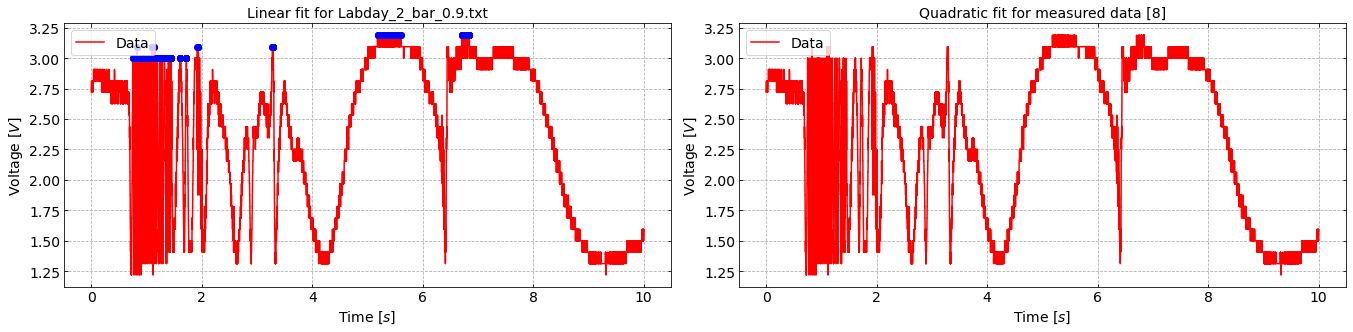

Linear Parameters:

Quadratic Parameters:
Number of peaks: 104


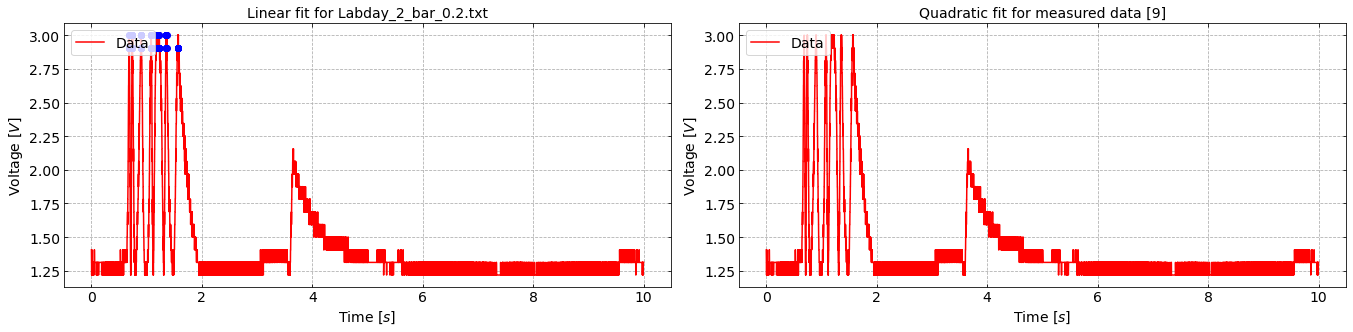

In [116]:
#Here using subplots to get 6 graphs for each iteration together.

lin_const = []
lin_sigma = []
quad_const =[]
quad_sigma =[]

# Regular expression pattern to extract the pressure value from the file name
pattern = r'\d+\.\d+'

# Lists to store pressure values and corresponding number of peaks
pressure_values = []
peaks_list = []

fig, axes = plt.subplots(1,2, figsize=(32*cm,8*cm)) #figure done in inches, use this to choose a good scale
axes = axes.flatten() #Means we can iterate over it

# Here is my loop where I plot for curve fits with different powers.
for i, (Data_name, data) in enumerate(zip(Data_names, V1)):
    # Extract the base name of the file
    file_name = os.path.basename(Data_name)
    
    # Extract pressure value from the file name using regular expression
    pressure_match = re.search(pattern, file_name)
    if pressure_match:
        pressure = float(pressure_match.group())
    else:
        print(f"Warning: Pressure value not found in file name: {file_name}")
        continue
    
    # Find the index where voltage data starts to rise (assuming data starts from a flat line)
    start_index = np.argmax(np.diff(data) > 0)

    # Detect peaks in the dataset
    peaks, _ = find_peaks(V1[i][start_index:], prominence = 1.591, distance=2.5)  # Use prominence instead. I tryed to use something with max and min, but i can't come up with something that gives a good estimation for all the data
    
    num_peaks= len(peaks)
    peaks_list.append(num_peaks)
    pressure_values.append(pressure)
    
    # Linear fit
    axes[0].cla()  # Clear the first subplot
    plt.sca(axes[0])  # Set current axis to the first subplot
    #popt_1, pcov_1 = sp.curve_fit(Linear_fit, time[i][start_index:], V1[i][start_index:], p0=p0_lin, absolute_sigma=True)
    # Calculate the standard deviations of the fitted parameters
    #lin_err = np.sqrt(np.diag(pcov_1))
    plt.title(f'Linear fit for {file_name}')
    #plt.plot(time[i], Linear_fit(time[i], *p0_lin), label='Linear Guess', color='black')  # Plot linear fit
    #plt.plot(time[i], Linear_fit(time[i], *popt_1), label='Linear Fit', color='blue')  # Plot linear fit
    plt.plot(time[i], V1[i], ls ='-', label='Data', color='red')  # Plot data points
    x_peaks = [time[i][peak]  for peak in peaks]
    v_peaks = [V1[i][peak] for peak in peaks]
    plt.plot(x_peaks, v_peaks, 'o', color = 'blue')
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.grid(ls='--')
    plt.legend()

    # Quadratic fit
    axes[1].cla()  # Clear the first subplot
    plt.sca(axes[1])  # Set current axis to the second subplot
    #popt_2, pcov_2 = sp.curve_fit(Quad_fit, time[i][start_index:], V1[i][start_index:], p0=p0_Quad, absolute_sigma=True)
    # Calculate standard deviation of the fitted parameters
    #quad_err = np.sqrt(np.diag(pcov_2))
    plt.title(f'Quadratic fit for measured data {[i+1]}')
    #plt.plot(time[i], Quad_fit(time[i], *p0_Quad), label='Quadratic Guess', color='black')  # Plot quadratic fit
    #plt.plot(time[i], Quad_fit(time[i], *popt_2), label='Quadratic Fit', color='green')  # Plot quadratic fit
    plt.plot(time[i], V1[i],'-', label='Data', color='red')  # Plot data points
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.legend()
    plt.grid(ls='--')
    plt.tight_layout()

    # Print statements to get the fitted parameters
    print("Linear Parameters:")
    #print("Amplitude:", popt_1[0], '$\pm$', lin_err[0])
    #print("n:", popt_1[1], '$\pm$', lin_err[1])
    #lin_const.append(popt_1[1])
    #lin_sigma.append(lin_err[1])
    #print("Offset:", popt_1[2], '$\pm$', lin_err[2])
    print()
    print("Quadratic Parameters:")
    #print("Amplitude:", popt_2[0], "+/-", [0])
    #print("n:", popt_2[1], "+/-", quad_err[1])
    #print("Offset:", popt_2[2], "+/-", quad_err[2])
    #print("m:", popt_2[3], "+/-", quad_err[3])
    print("Number of peaks:", num_peaks)
    plt.show()


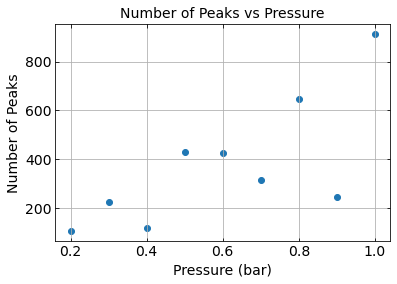

In [117]:
plt.figure()
plt.scatter(pressure_values, peaks_list, marker='o')
plt.xlabel('Pressure (bar)')
plt.ylabel('Number of Peaks')
plt.title('Number of Peaks vs Pressure')
plt.grid(True)
plt.show()

In [60]:
# Plot peaks vs pressure
pressure = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# I think the result is ok. The three points, which are out of line, could be better. Maybe we can improve them by making the prominience argument better

import scipy.optimize as sp

def linear_fit(x, a, b):
    return a * x + b

popt, pcov = sp.curve_fit(linear_fit, pressure, peaks_list, p0 = [2, 0], sigma = 5, absolute_sigma = True)
plt.plot(pressure, linear_fit(pressure, *popt), linestyle = '-', color = 'cyan', linewidth = 2)
plt.errorbar(pressure, peaks_list, np.full(len(peaks_list), 100), np.full(len(pressure), 0.05), fmt = 'o', capsize = 3, ecolor = 'black', 
             color = 'tab:red')


plt.style.use('classic')

ValueError: `sigma` has incorrect shape.

Idea to analyze the data:
- Measure the pressure
- Count the peaks by filtering the right places of the data out or by setting a limit of when a peak can be seen as peak
- For each measurement save the number of peaks and the number of valid peaks and fit them linearly
- Use the result as the refraction index of compressed air which can be used to find the refraction index of air, by fitting the data to a sine curve